In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from IPython.display import HTML, display
import datetime as dt

from utils.diagnostics import compute_summary_statistics
from utils.dataset_utils import aggregate_results

plt.style.use('bmh')
plt.rcParams['lines.linewidth'] = 1

In [10]:
model_names = [

    "ew_lo",

]
stats_order = ["E[R]", "Std(R)", "Sharpe", "Sortino", "AvgDD", "MaxDD", "% Positive Ret."]

In [11]:
all_summary = []

for model in model_names:

        output_path = os.path.join(os.getcwd(),
                                   "data",
                                   "outputs",
                                   model)
    
        summary = aggregate_results(path=output_path)

        # compute pnl
        summary["pnl"] = summary["returns"] * summary["weights"]

        # add model name
        summary["model"] = model

        # save summary
        all_summary.append(summary)
all_summary_df = pd.concat(all_summary, axis=0)

## 1) Summary Statistics of the Portfolios

In [12]:
all_stats = {}
for model in model_names:

    portfolio_returns = torch.tensor(all_summary_df.loc[all_summary_df["model"] == model].groupby("date").sum()["pnl"])
    stats = compute_summary_statistics(portfolio_returns=portfolio_returns)

    all_stats[model] = stats
all_stats_df = pd.DataFrame(all_stats).T[stats_order]

display(HTML(all_stats_df.to_html()))

,E[R],Std(R),Sharpe,Sortino,AvgDD,MaxDD,% Positive Ret.
ew_lo,842245.681401,12219.046468,68.92892,NaN,NaN,NaN,0.964112


## 2) Cummulative Returns of the Portfolios

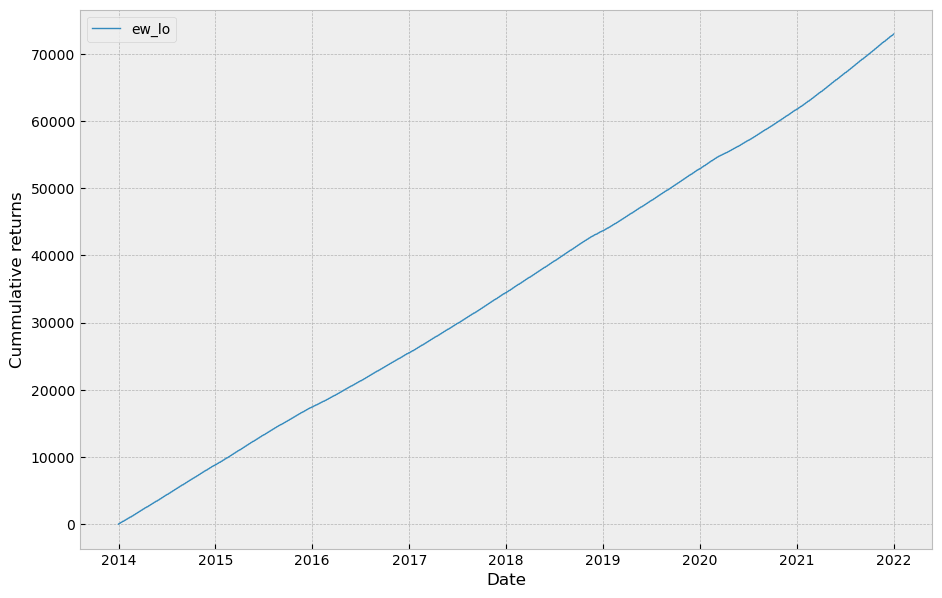

In [13]:

fig, ax = plt.subplots(figsize=(11, 7))
for model in model_names:
    summary_df = all_summary_df.loc[all_summary_df["model"] == model]
    cum_pnl_df = summary_df.groupby("date").sum()[["pnl"]].loc["2014-01-01":].cumsum().reset_index()
    ax.plot(pd.to_datetime(cum_pnl_df['date']), cum_pnl_df["pnl"], label=model)

plt.xlabel("Date")
plt.ylabel("Cummulative returns")
plt.legend(loc='best', fontsize=10)   
# fig.savefig('img/' + ticker + '_' + key1 + '_fs_methods.png')
plt.show()

## 3) Check weights

In [14]:
check_name = model_names[0]
all_summary_df.loc[(all_summary_df["model"] == check_name), ["returns", "weights", "pnl"]].describe()

,returns,weights,pnl
count,8.452150e+06,8.452150e+06,8.452150e+06
mean,3.342245e+01,3.395586e-04,1.134888e-02
std,9.427552e+01,1.716731e-14,3.201206e-02
min,-7.103999e+01,3.395586e-04,-2.412224e-02
25%,0.000000e+00,3.395586e-04,0.000000e+00
50%,1.460000e+01,3.395586e-04,4.957555e-03
75%,4.119999e+01,3.395586e-04,1.398981e-02
max,5.959332e+03,3.395586e-04,2.023542e+00


In [15]:
all_summary_df.loc[all_summary_df["returns"] >= 100]

,date,ticker,returns,weights,pnl,model
10,2011-01-03,PCP,140.84001,0.00034,0.047823,ew_lo
54,2011-01-03,CMI,111.75003,0.00034,0.037946,ew_lo
58,2011-01-03,FLS,120.29000,0.00034,0.040846,ew_lo
59,2011-01-03,CMG,223.63007,0.00034,0.075936,ew_lo
114,2011-01-03,CME,316.44016,0.00034,0.107450,ew_lo
...,...,...,...,...,...,...
8452109,2021-12-31,HON,208.51007,0.00034,0.070801,ew_lo
8452112,2021-12-31,CAT,206.74008,0.00034,0.070200,ew_lo
8452127,2021-12-31,LAD,296.95010,0.00034,0.100832,ew_lo
8452129,2021-12-31,SRE,132.27995,0.00034,0.044917,ew_lo
